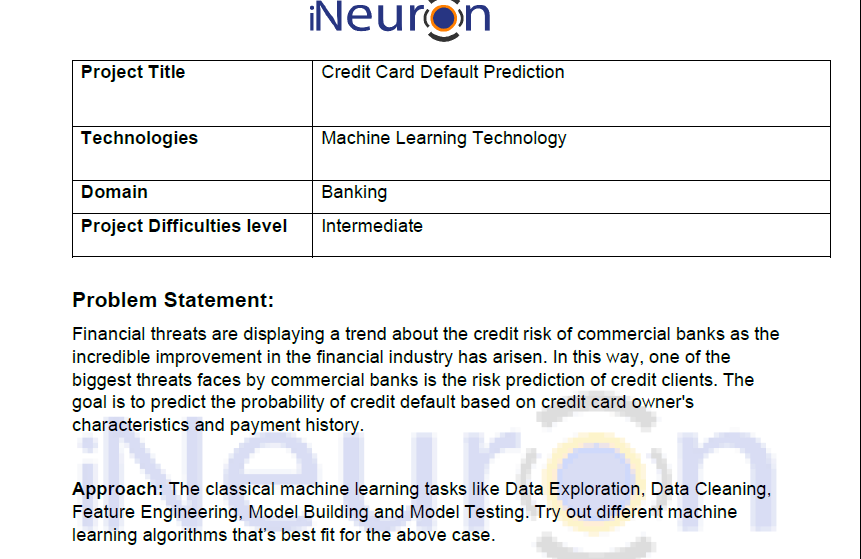

In [236]:
#importing necessary libraries for building the project

#basic libraries
import pandas as pd
import numpy as np
import scipy
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#library for standardization of Data
from sklearn.preprocessing import StandardScaler

#library for SMOTE (synthetic minority oversampling technique) to solve the imbalance problem.
from imblearn.over_sampling import SMOTE

#library for splitting the data into training and testing data
from sklearn.model_selection import train_test_split

#library for logistic Regression model
from sklearn.linear_model import LogisticRegression

#library for confusion matrix
from sklearn.metrics import confusion_matrix

#library for Applying GridSearch CV
from sklearn.model_selection import GridSearchCV

#library for viewing classification report
from sklearn.metrics import classification_report

#libraries for DecisionTree model
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

#libraries for RandomForest Model
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

#libraries for SVM Model
from sklearn import svm
from sklearn.svm import SVC

#libraries for Applying RandomizedSearch CV
from sklearn.model_selection import RandomizedSearchCV

#libraries for viewing some scores
from sklearn.metrics import accuracy_score as a
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, auc

#library for avoid warinings
import warnings
warnings.filterwarnings('ignore')

In [237]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Data Science Projects\I_Nuron\Credit Card Fault Prediction

01/14/2023  01:11 PM    <DIR>          .
01/14/2023  01:11 PM    <DIR>          ..
01/09/2023  04:27 PM    <DIR>          .ipynb_checkpoints
01/14/2023  01:11 PM         2,208,295 CCFP.ipynb
01/09/2023  03:58 PM           181,555 Credit Card Default Prediction.pdf
01/10/2023  12:08 PM         2,348,781 credit-card-default-prediction.ipynb
01/13/2023  10:22 PM        10,342,403 Final_df.csv
09/20/2019  12:04 AM         2,862,995 UCI_Credit_Card.csv
               5 File(s)     17,944,029 bytes
               3 Dir(s)  133,425,508,352 bytes free


In [238]:
#loading the dataSet
df=pd.read_csv("UCI_Credit_Card.csv")

In [317]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [319]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

# Performing EDA

In [240]:
df.shape

(30000, 25)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [242]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [243]:
df.duplicated().sum()

0

In [244]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [245]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [246]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [247]:
df['Is_Defaulter'] =df ['default.payment.next.month']
df.drop('default.payment.next.month',axis = 1,inplace=True)

In [248]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Is_Defaulter'],
      dtype='object')

<AxesSubplot:xlabel='Is_Defaulter', ylabel='count'>

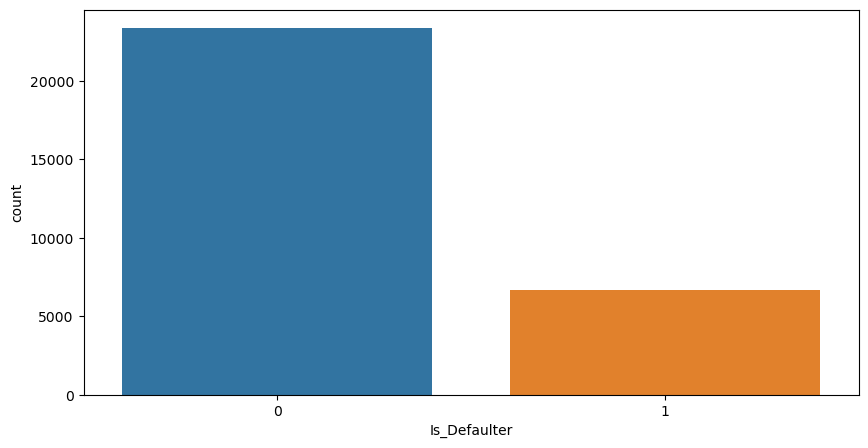

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Is_Defaulter', data = df)

In [250]:
df["Is_Defaulter"].value_counts()

0    23364
1     6636
Name: Is_Defaulter, dtype: int64

In [251]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [252]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [253]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [254]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**Marriage**


> 1 = married; 2 = single; 3 = others

In [255]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [256]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [257]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [258]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['Is_Defaulter']

In [259]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

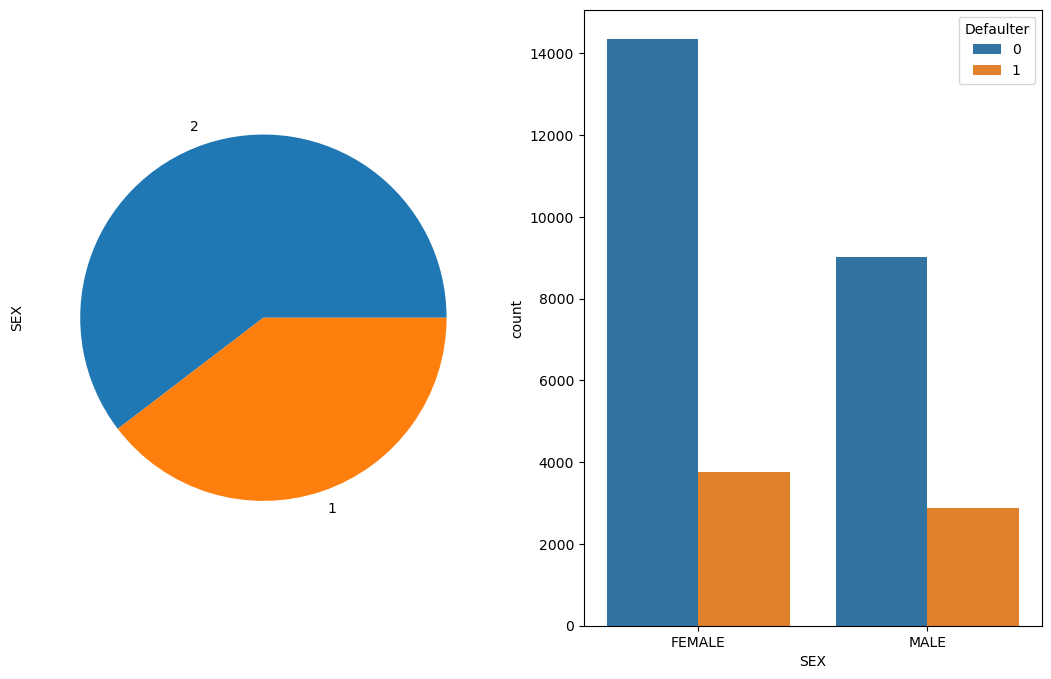

<Figure size 1000x500 with 0 Axes>

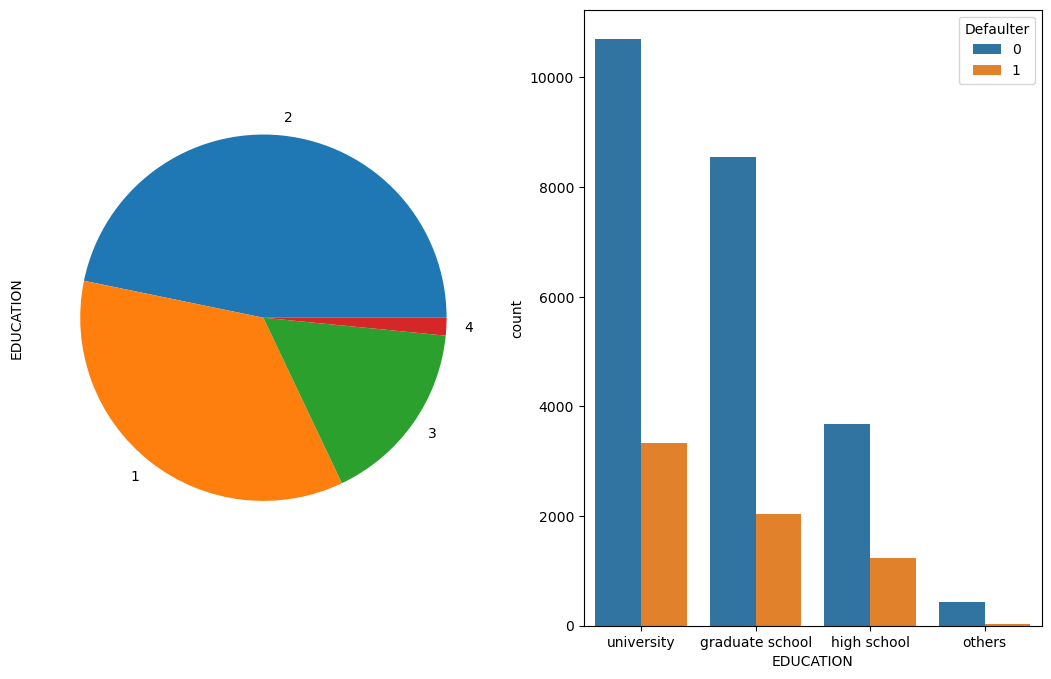

<Figure size 1000x500 with 0 Axes>

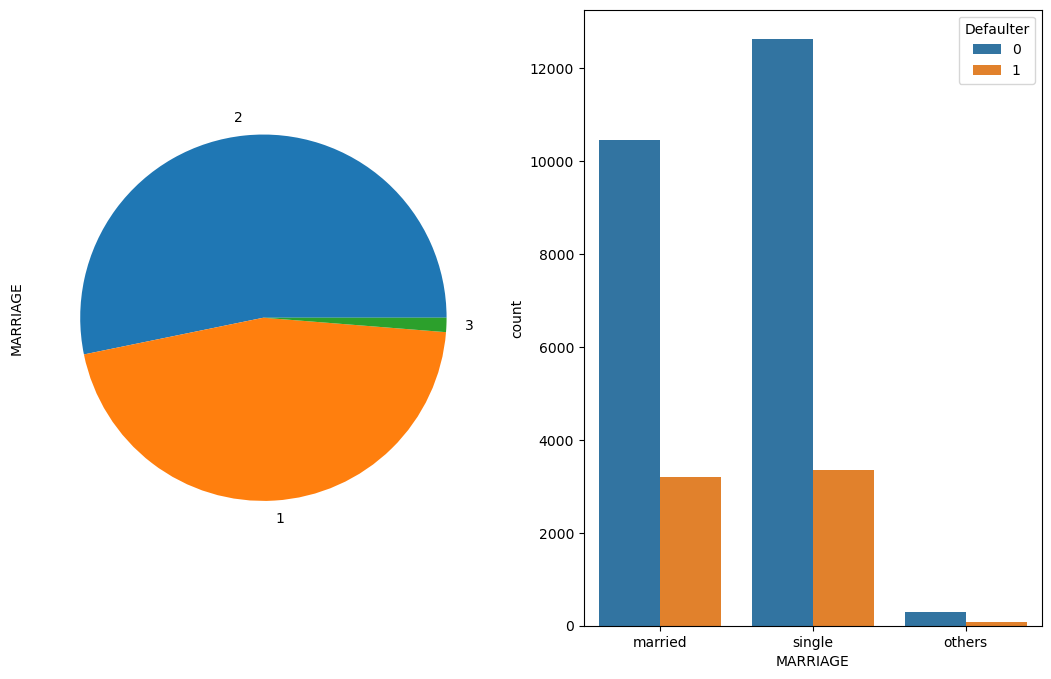

In [260]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

In [261]:
#renaming columns 

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [320]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [263]:
df['AGE']=df['AGE'].astype('int')

<AxesSubplot:xlabel='index', ylabel='AGE'>

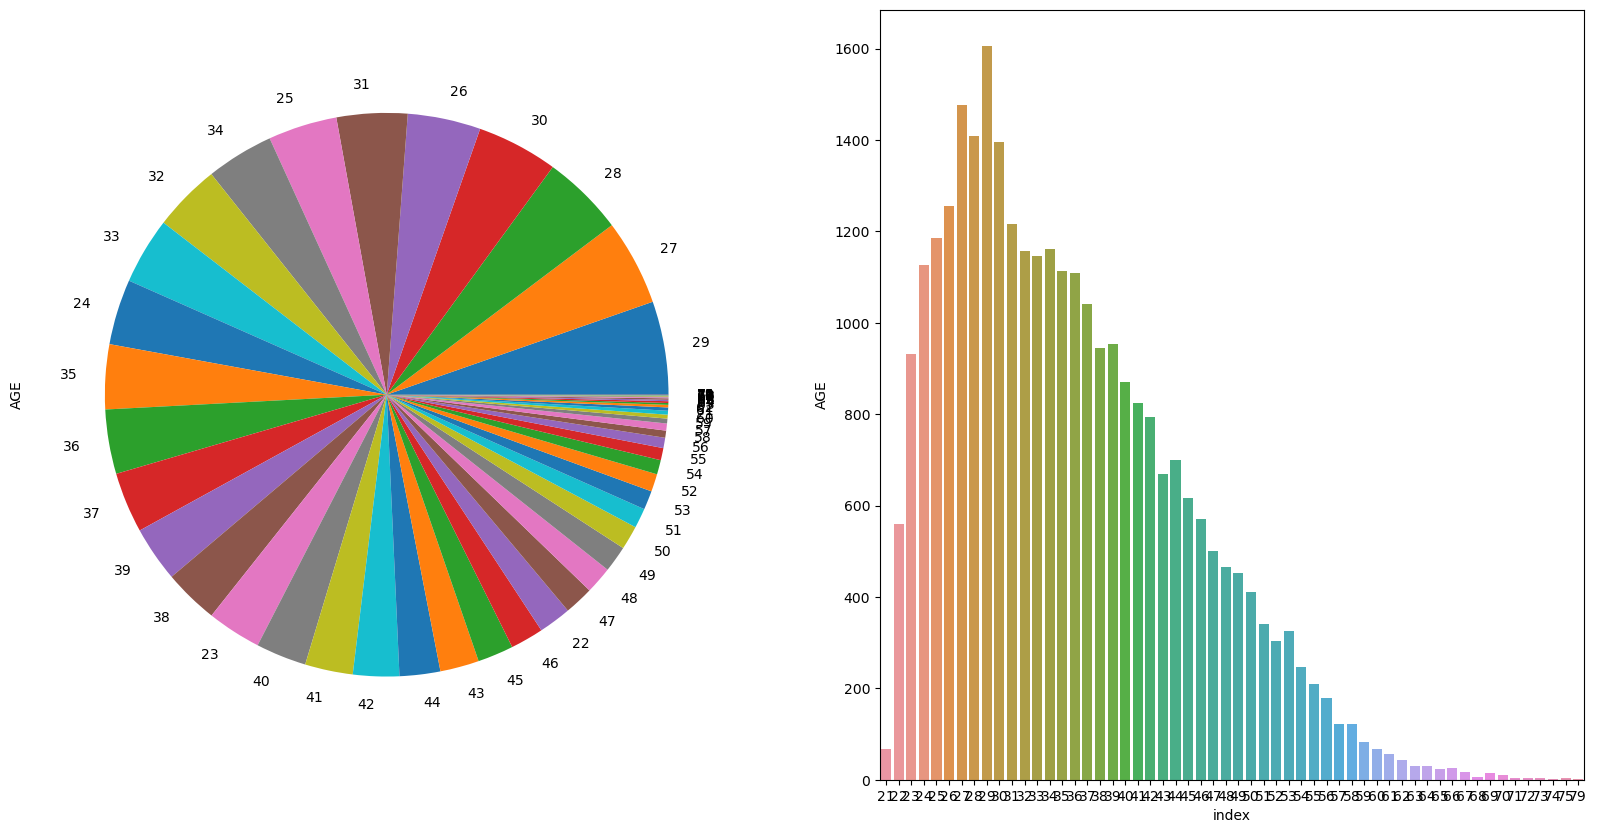

In [264]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [265]:
df.groupby('Is_Defaulter')['AGE'].mean()

Is_Defaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [266]:
df = df.astype('int')

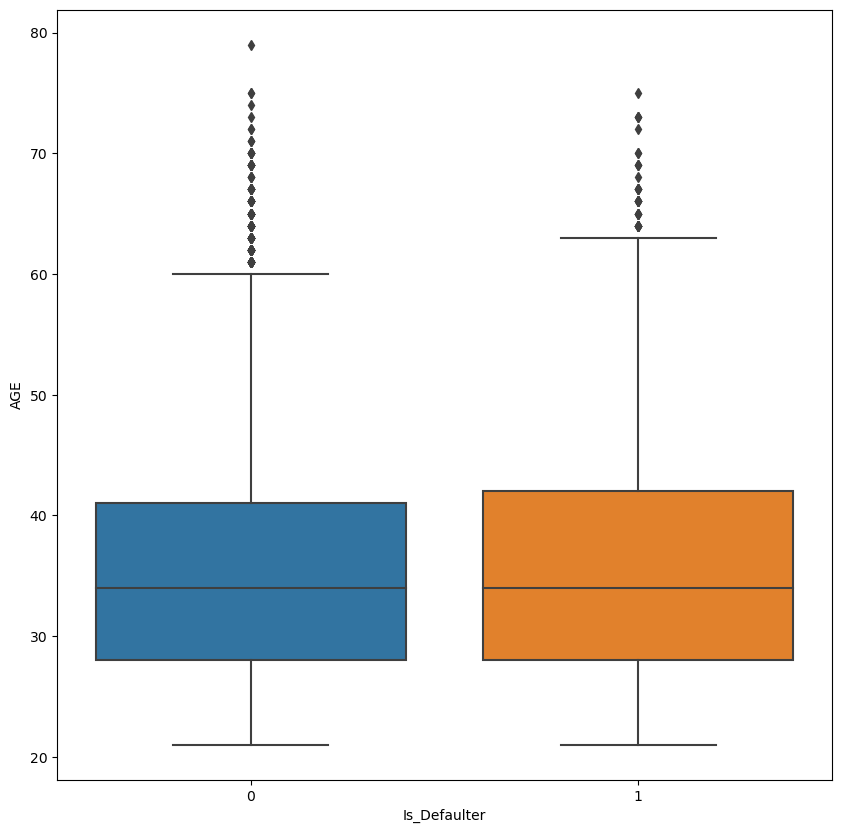

In [267]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Is_Defaulter", y="AGE", data=df)

In [268]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

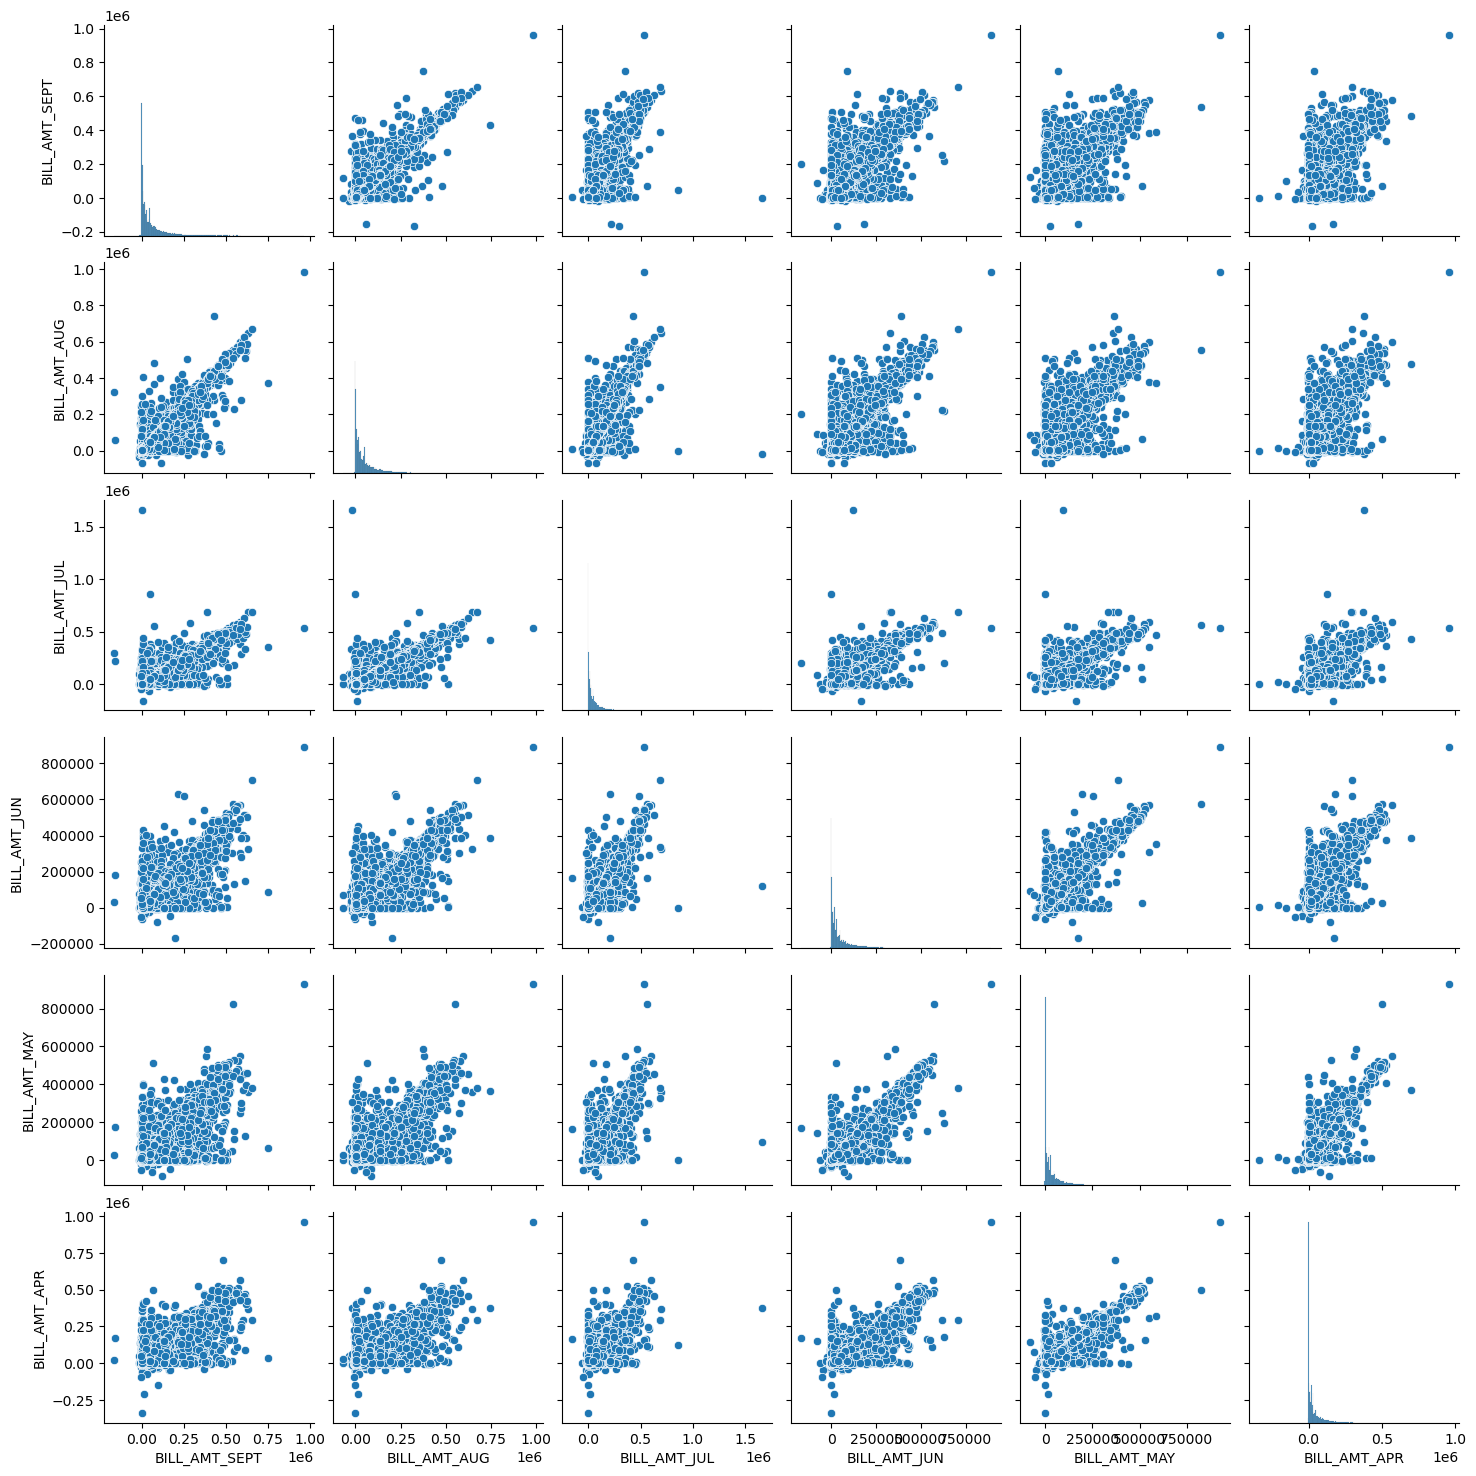

In [269]:
sns.pairplot(data = bill_amnt_df)

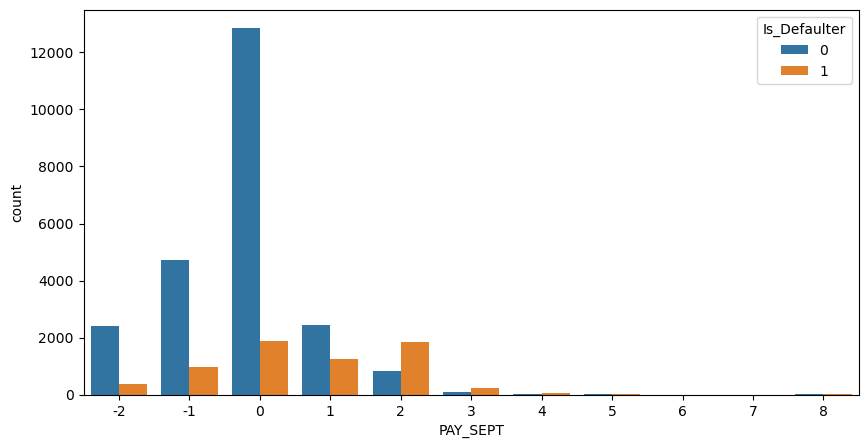

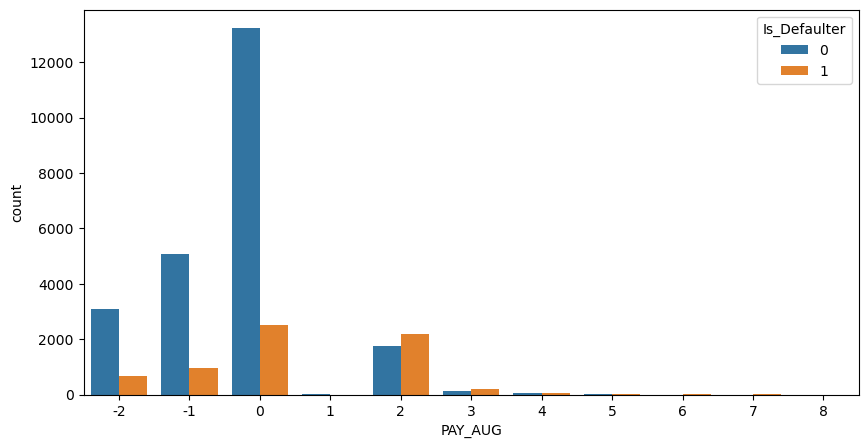

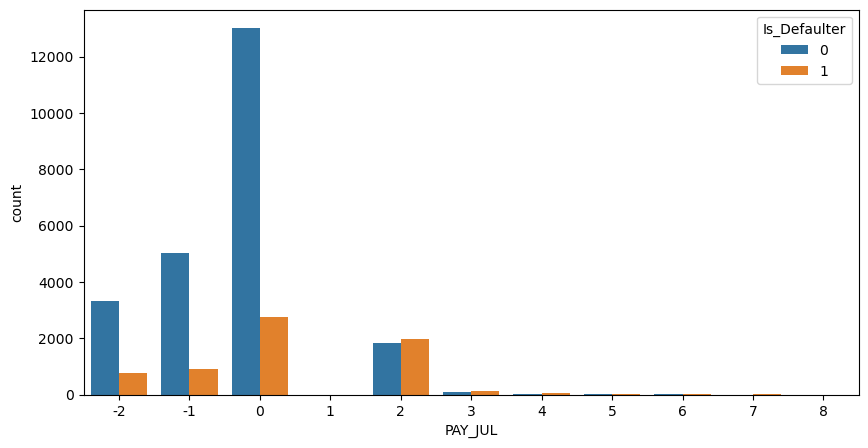

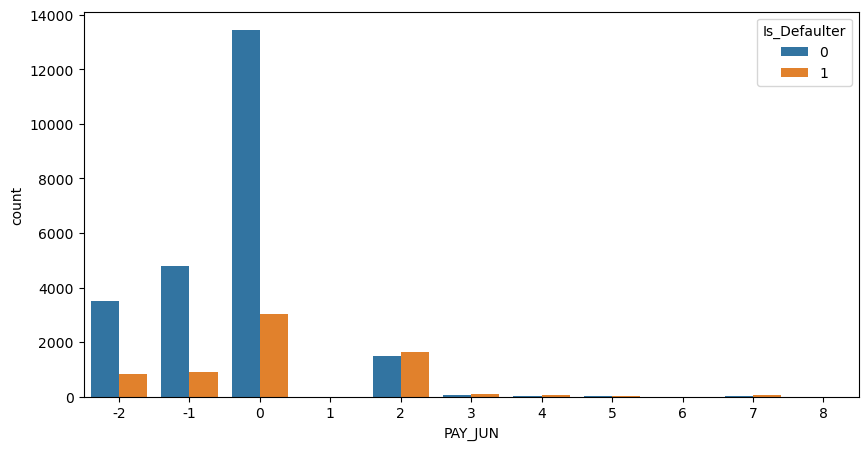

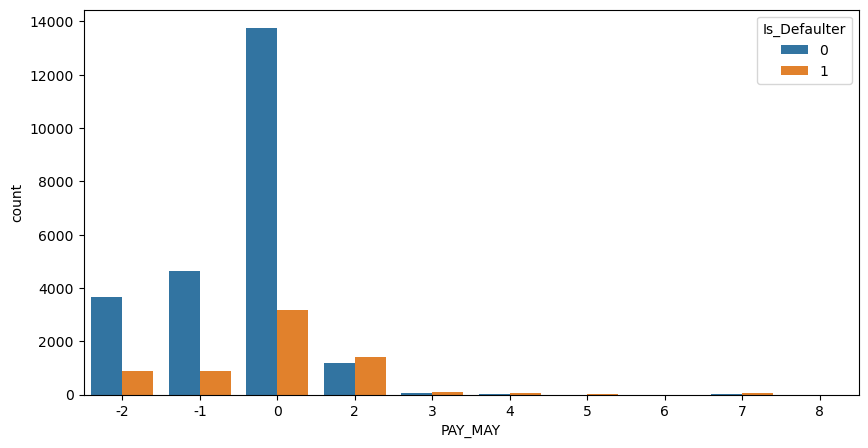

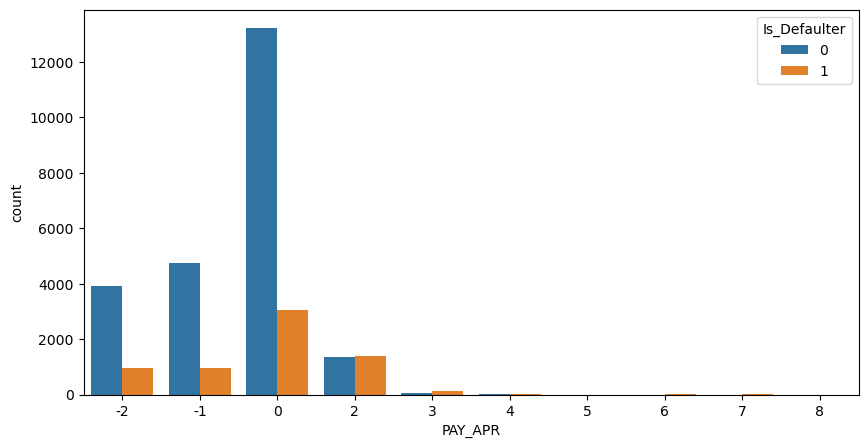

In [270]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Is_Defaulter', data = df)

In [271]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'Is_Defaulter']]

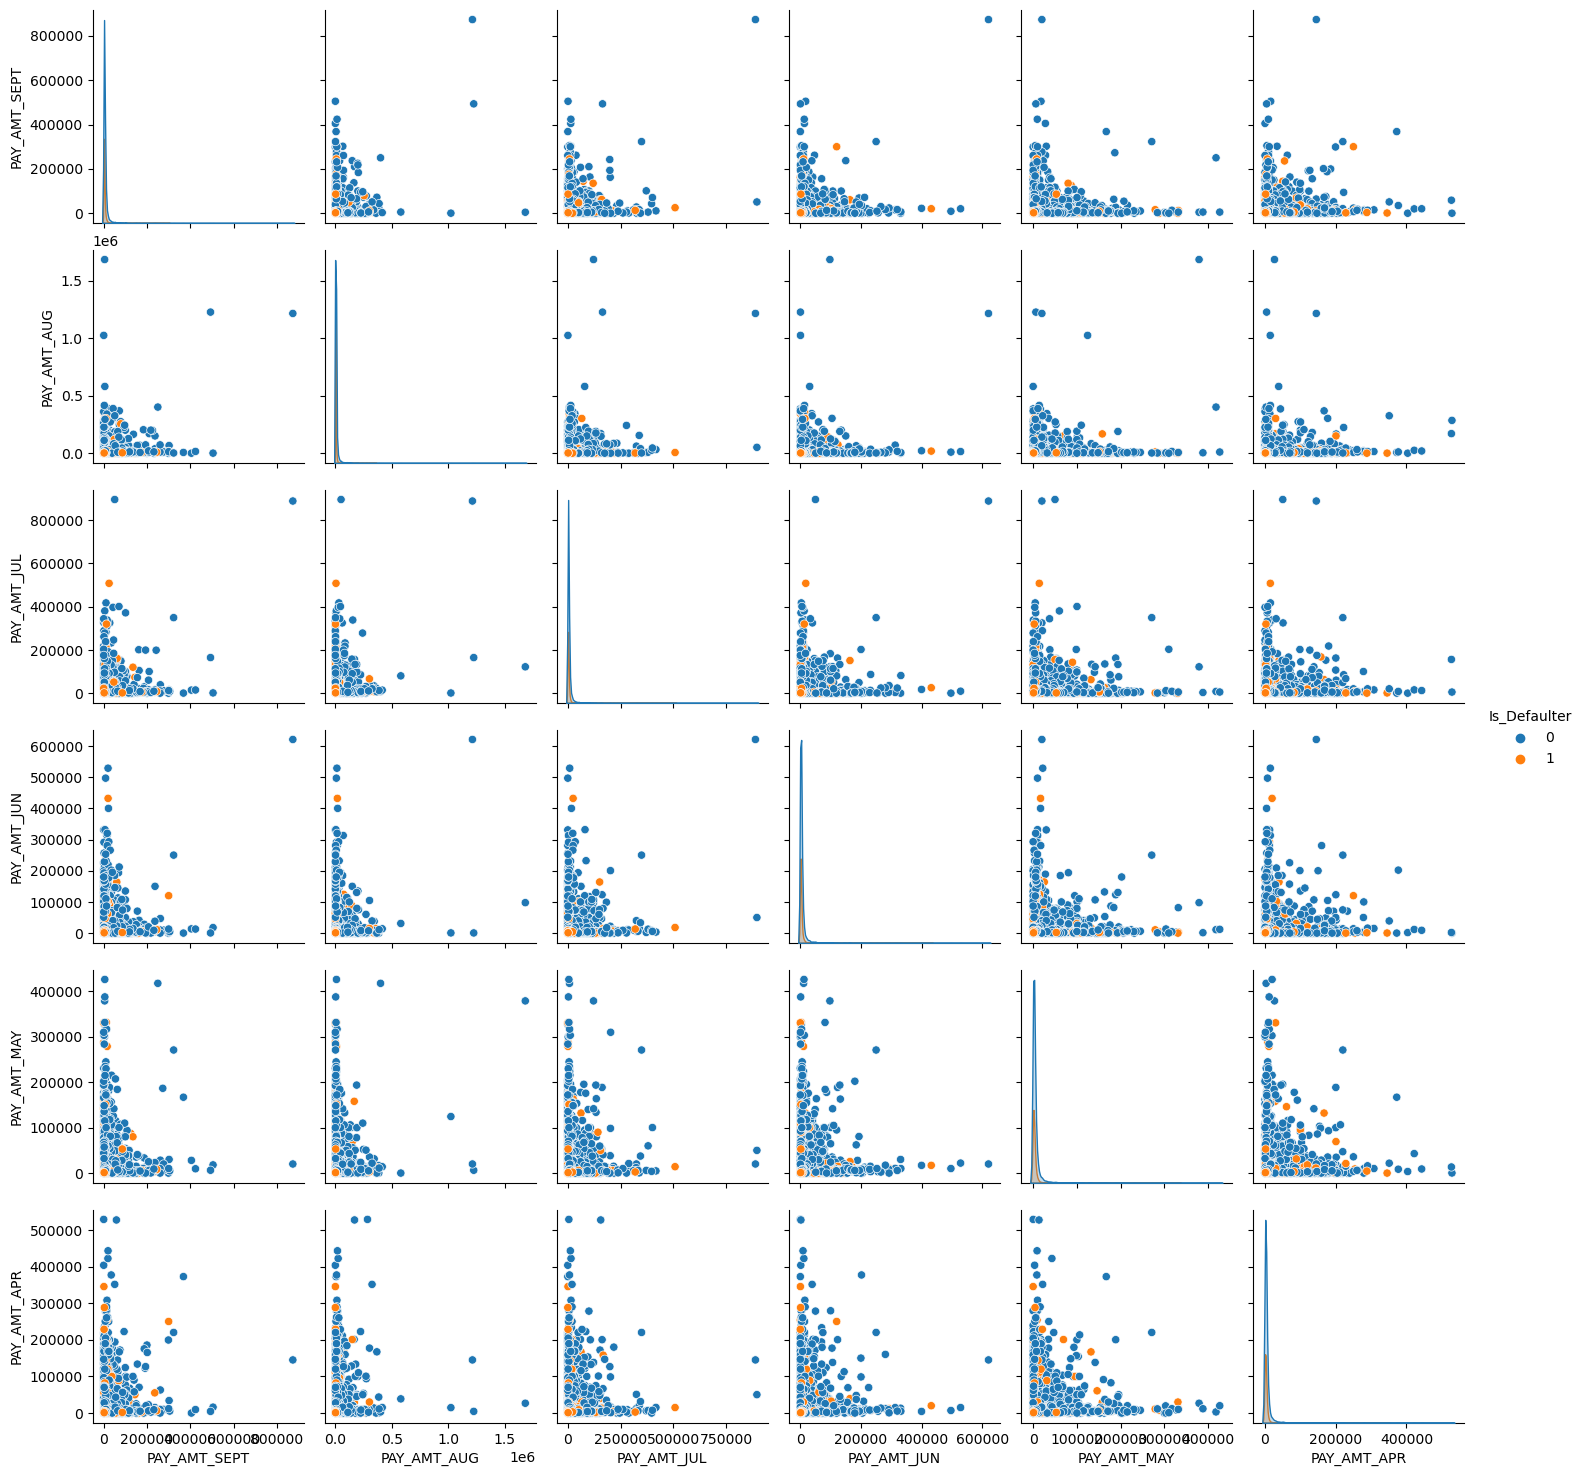

In [272]:
sns.pairplot(data = pay_amnt_df, hue='Is_Defaulter')

In [273]:
df.shape

(30000, 25)

In [274]:
#!pip install imbalanced-learn

In [275]:
#code for balancing the imbalance dataset
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Is_Defaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [276]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,4320,80000,1,1,1,31,1,2,2,1,...,22154,21639,23145,22764,695,2166,133,1866,133,1000
46724,23768,80000,1,1,2,30,2,2,2,2,...,69590,70642,71944,73452,2327,3637,2793,3020,2813,0
46725,21841,203990,2,1,1,31,0,-1,-1,-1,...,30534,2413,365,5577,337,30535,15797,365,5639,2057
46726,15760,30000,1,2,2,22,2,2,2,2,...,10291,16605,17453,16966,1500,0,6550,1416,74,45


In [277]:
columns = list(df.columns)

In [278]:
columns.pop()

'Is_Defaulter'

In [279]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [280]:
balance_df['Is_Defaulter'] = y_smote

<AxesSubplot:xlabel='Is_Defaulter', ylabel='count'>

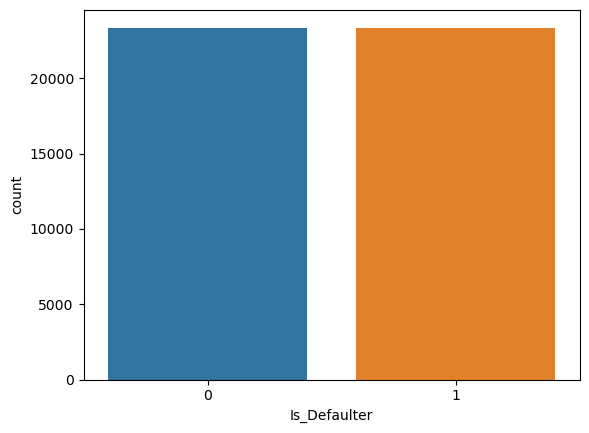

In [281]:
sns.countplot(x=balance_df['Is_Defaulter'],data=balance_df)

In [282]:
balance_df['Is_Defaulter'].value_counts()

1    23364
0    23364
Name: Is_Defaulter, dtype: int64

In [283]:
balance_df[balance_df['Is_Defaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,4320,80000,1,1,1,31,1,2,2,1,...,21639,23145,22764,695,2166,133,1866,133,1000,1
46724,23768,80000,1,1,2,30,2,2,2,2,...,70642,71944,73452,2327,3637,2793,3020,2813,0,1
46725,21841,203990,2,1,1,31,0,-1,-1,-1,...,2413,365,5577,337,30535,15797,365,5639,2057,1
46726,15760,30000,1,2,2,22,2,2,2,2,...,16605,17453,16966,1500,0,6550,1416,74,45,1


In [284]:
balance_df[balance_df['Is_Defaulter']==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0


In [285]:
balance_df['Is_Defaulter'].value_counts()

1    23364
0    23364
Name: Is_Defaulter, dtype: int64

In [286]:
balance_df.shape

(46728, 25)

In [287]:
balance_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'Is_Defaulter'],
      dtype='object')

# Feature Engineering

In [292]:
df_fe = balance_df.copy()

In [293]:
df_fe.shape

(46728, 25)

In [294]:
df_fe['Payement_Value'] = df_fe['PAY_SEPT'] + df_fe['PAY_AUG'] + df_fe['PAY_JUL'] + df_fe['PAY_JUN'] + df_fe['PAY_MAY'] + df_fe['PAY_APR']

In [59]:
df_fe.groupby('Is_Defaulter')['Payement_Value'].mean()

Is_Defaulter
0   -1.980140
1    1.675569
Name: Payement_Value, dtype: float64

<AxesSubplot:xlabel='Is_Defaulter', ylabel='Payement_Value'>

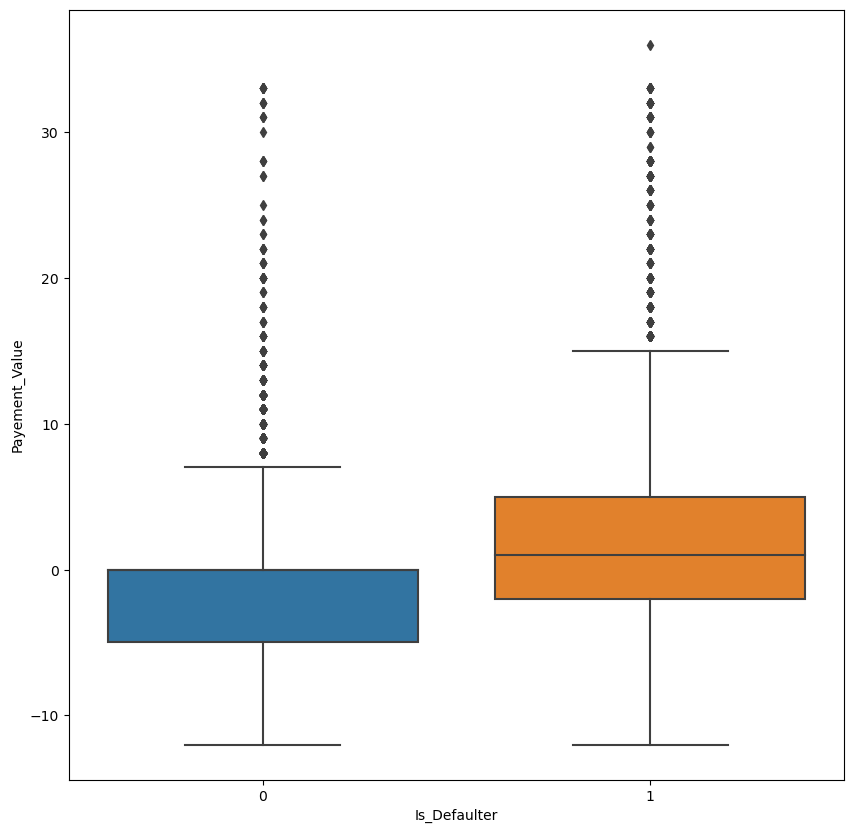

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fe, x = 'Is_Defaulter', y = 'Payement_Value' )

In [298]:
df_fe['Dues'] = (df_fe['BILL_AMT_APR']+df_fe['BILL_AMT_MAY']+df_fe['BILL_AMT_JUN']+df_fe['BILL_AMT_JUL']+df_fe['BILL_AMT_AUG']+df_fe['BILL_AMT_SEPT'])-(df_fe['PAY_AMT_APR']+df_fe['PAY_AMT_MAY']+df_fe['PAY_AMT_JUN']+df_fe['PAY_AMT_JUL']+df_fe['PAY_AMT_AUG']+df_fe['PAY_AMT_SEPT'])

In [299]:
df_fe.groupby('Is_Defaulter')['Dues'].mean()

Is_Defaulter
0    237459.487203
1    242640.829610
Name: Dues, dtype: float64

In [300]:
df_fe['EDUCATION'].unique()

array([2, 1, 3, 4])

In [301]:
 
df_fe['EDUCATION']=np.where(df_fe['EDUCATION'] == 6, 4, df_fe['EDUCATION'])
df_fe['EDUCATION']=np.where(df_fe['EDUCATION'] == 0, 4, df_fe['EDUCATION'])

In [302]:

df_fe['MARRIAGE'].unique()

array([1, 2, 3])

In [303]:
df_fe['MARRIAGE']=np.where(df_fe['MARRIAGE'] == 0, 3, df_fe['MARRIAGE'])

In [304]:
df_fe.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [305]:
df_fe.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290


# Creating Dummies

In [306]:
df_fe = pd.get_dummies(df_fe,columns=['EDUCATION','MARRIAGE'])

In [310]:
df_fe.shape

(46728, 32)

In [311]:
df_fe.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Is_Defaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,7015,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,12077,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,90635,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,222946,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,50290,0,0,0,1,1,0,0


In [312]:
df_fe.drop(['EDUCATION_others'],axis = 1, inplace = True)

In [313]:
df_fe.drop(['MARRIAGE_others'],axis = 1, inplace = True)

In [314]:
df_fe.shape

(46728, 30)

In [315]:
df_fe = pd.get_dummies(df_fe, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [316]:
df_fe.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [75]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fe.replace(encoders_nums)

In [76]:
df_fe.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [77]:
df_fe.drop('ID',axis = 1, inplace = True)

In [78]:
df_fe.to_csv('Final_df.csv')

In [79]:
df_fe = pd.read_csv('./Final_df.csv')

In [80]:
df_fe.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,2,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,3,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,4,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [81]:
df_fe.drop(['Unnamed: 0'],axis=1,inplace=True)

In [82]:
df_fe

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,FEMALE,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,MALE,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,143222,MALE,39,34935,34596,35103,36458,36986,38007,515,...,0,0,0,1,0,0,0,0,0,0
46724,360000,FEMALE,33,-186,-186,-186,-186,-186,-186,0,...,0,0,0,0,0,0,0,0,0,0
46725,80000,MALE,30,307,667,307,307,307,412,667,...,1,0,0,0,0,0,0,0,0,0
46726,180000,FEMALE,39,54,10,10,10,10,10,0,...,1,0,0,0,0,0,0,0,0,0


# apply logistic regression

In [83]:
df_log = df_fr.copy()

In [84]:
df_log.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [85]:
df_log.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'Is_Defaulter', 'Payement_Value', 'Dues',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', '

In [86]:
df_log=df_log[[ 'Is_Defaulter', 'Payement_Value', 'Dues','ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
       'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_1', 'PAY_MAY_2', 'PAY_MAY_3',
       'PAY_MAY_4', 'PAY_MAY_5', 'PAY_MAY_6', 'PAY_MAY_7', 'PAY_MAY_8',
       'PAY_APR_-1', 'PAY_APR_0', 'PAY_APR_1', 'PAY_APR_2', 'PAY_APR_3',
       'PAY_APR_4', 'PAY_APR_5', 'PAY_APR_6', 'PAY_APR_7', 'PAY_APR_8']]

In [87]:
df_log

,Is_Defaulter,Payement_Value,Dues,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,-2,3913,1,20000,0,24,3913,3102,689,...,0,0,0,0,0,0,0,0,0,0
1,1,3,10352,2,120000,0,26,2682,1725,2682,...,0,0,0,1,0,0,0,0,0,0
2,0,0,76608,3,90000,0,34,29239,14027,13559,...,0,1,0,0,0,0,0,0,0,0
3,0,0,174713,4,50000,0,37,46990,48233,49291,...,0,1,0,0,0,0,0,0,0,0
4,0,-2,44620,5,50000,1,57,8617,5670,35835,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,1,6,171975,21314,143222,1,39,34935,34596,35103,...,0,0,0,1,0,0,0,0,0,0
46724,1,-12,-1116,25522,360000,0,33,-186,-186,-186,...,0,0,0,0,0,0,0,0,0,0
46725,1,-5,-1206,13062,80000,1,30,307,667,307,...,1,0,0,0,0,0,0,0,0,0
46726,1,-5,44,14881,180000,0,39,54,10,10,...,1,0,0,0,0,0,0,0,0,0


In [88]:
df_log.columns

Index(['Is_Defaulter', 'Payement_Value', 'Dues', 'ID', 'LIMIT_BAL', 'SEX',
       'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', '

In [89]:
x=df_log.iloc[:,3:84]
y=df_log.iloc[:,0]

In [90]:
x

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,21314,143222,1,39,34935,34596,35103,36458,36986,38007,...,0,0,0,1,0,0,0,0,0,0
46724,25522,360000,0,33,-186,-186,-186,-186,-186,-186,...,0,0,0,0,0,0,0,0,0,0
46725,13062,80000,1,30,307,667,307,307,307,412,...,1,0,0,0,0,0,0,0,0,0
46726,14881,180000,0,39,54,10,10,10,10,10,...,1,0,0,0,0,0,0,0,0,0


In [91]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Is_Defaulter, Length: 46728, dtype: int32

In [92]:
#scaling the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [93]:
x

array([[-1.76318118e+00, -1.06128182e+00, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.76306279e+00, -2.66057075e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.76294439e+00, -5.04624497e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       ...,
       [-2.16835571e-01, -5.84146971e-01,  1.00872666e+00, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.47666565e-03,  2.11077770e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-6.06944199e-01, -1.07012126e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03]])

In [94]:
y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: Is_Defaulter, Length: 46728, dtype: int32

In [96]:
#Spliting the data into Train Data and Testing Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [97]:
x_train.shape

(32709, 81)

In [98]:
y_train.shape

(32709,)

In [99]:
x_test.shape

(14019, 81)

In [100]:
y_test.shape

(14019,)

In [101]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [102]:
y_train_pred=classifier.predict(x_train)

In [103]:
TrainAccuracy_log=ac(y_train,y_train_pred)

In [104]:
TrainAccuracy_log

0.7538597939405056

In [105]:
y_test_pred=classifier.predict(x_test)

In [106]:
y_test_pred

array([1, 1, 0, ..., 0, 0, 0])

In [107]:
TestAccuracy_log=ac(y_test_pred,y_test)
TestAccuracy_log

0.7499108352949568

In [108]:
classifier.intercept_

array([1.10429355])

In [109]:
classifier.coef_

array([[-0.01184483, -0.27212648,  0.40879552, -0.08956609, -0.26994309,
         0.27424463,  0.13724142, -0.04160685, -0.01946489,  0.05207815,
        -0.25568506, -0.17148584, -0.0949586 , -0.05845209, -0.05743068,
        -0.04878047,  1.18276498,  0.46951503,  1.04006709,  0.60186865,
         0.09206462,  0.14595886,  0.33382931,  0.50331954,  0.74655344,
         0.24417821,  0.10365329,  0.0597593 ,  0.04149108,  0.04718961,
        -0.08675967,  0.06455433, -0.00169498,  0.83256094,  0.02469376,
        -0.00817256, -0.03844922,  0.00897328, -0.01417271,  0.04274346,
        -0.00432983, -0.01109062, -0.01449593,  1.13658897,  0.04510991,
        -0.00136061, -0.01243869,  0.01438953,  0.13722158, -0.01672202,
         0.05525421, -0.0119478 , -0.03627904,  1.08346028, -0.00542427,
        -0.00676391,  0.00265592, -0.06063308, -0.18162287, -0.43017478,
         0.00275208,  0.0290984 ,  0.03881769,  1.32803909,  0.09958134,
         0.01895642,  0.02100045,  0.03980047,  0.1

In [110]:
set(y_train)

{0, 1}

In [111]:
confusion_matrix(y_test_pred,y_test)


array([[5744, 2236],
       [1270, 4769]], dtype=int64)

In [112]:
#Genrating Report of the model
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      7980
           1       0.68      0.79      0.73      6039

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



In [113]:
parameter = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [114]:
#Applying GridSearch CV to Find out best Parameter
grid_search = GridSearchCV(LogisticRegression(),   
                           param_grid = parameter,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [115]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [116]:
optimized_clf = grid_search.best_estimator_

In [141]:
test_class_preds = optimized_clf.predict(x_test)

In [143]:
test_class_preds = optimized_clf.predict(x_test)
test_precision_score_log = precision_score(test_class_preds,y_test)
test_recall_score_log = recall_score(test_class_preds,y_test)
test_f1_score_log = f1_score(test_class_preds,y_test)
test_roc_score_log = roc_auc_score(test_class_preds,y_test)

print("The precision on test data is ", test_precision_score_log)
print("The recall on test data is ", test_recall_score_log)
print("The f1 on test data is ", test_f1_score_log)
print("The roc_score on test data is ", test_roc_score_log)

The precision on test data is  0.6799428979300499
The recall on test data is  0.7898839137645107
The f1 on test data is  0.730801687763713
The roc_score on test data is  0.7546240197186554


In [117]:
best_param=grid_search.best_params_
best_param

{'C': 0.1, 'penalty': 'l2'}

In [118]:
bestscore=grid_search.best_score_
bestscore

0.7527285198819516

In [119]:
log_model=LogisticRegression(**best_param)

In [120]:
log_model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [121]:
#Genrating Report of the model.
print(classification_report(y_test,log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      7014
           1       0.79      0.68      0.73      7005

    accuracy                           0.75     14019
   macro avg       0.75      0.75      0.75     14019
weighted avg       0.75      0.75      0.75     14019



[[13358  2992]
 [ 5059 11300]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

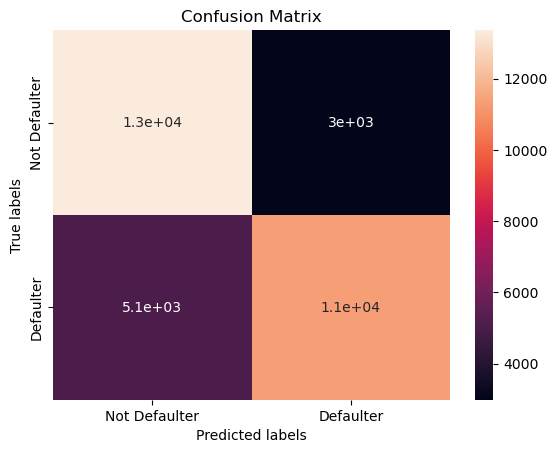

In [122]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train,y_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

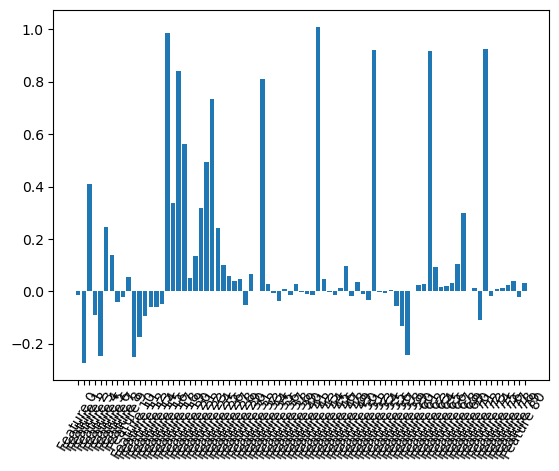

In [123]:
class_idx = 0
coef = optimized_clf.coef_[class_idx]
plt.bar(range(len(coef)), coef)
plt.xticks(range(len(coef)), [f"Feature {i}" for i in range(len(coef))], rotation=60)
plt.show()


In [124]:
y_preds_proba_lr = optimized_clf.predict_proba(x_test)[::,1]

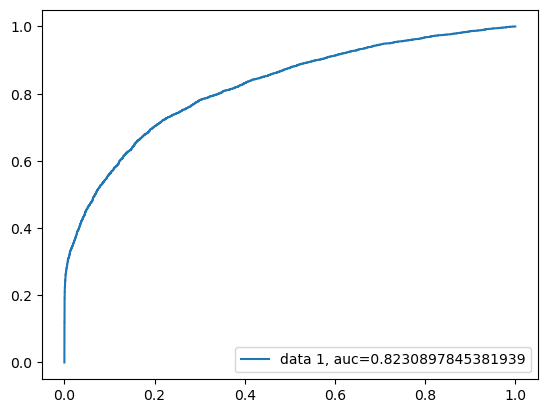

In [125]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 74%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

# Apply Decision Tree

# Decision Tree using gini criteria

In [127]:
#fitting data into model
model_DT_GI = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=100)
model_DT_GI.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=100, min_samples_split=5)

In [128]:
preds_DT_GI = model_DT_GI.predict(x_test)

In [129]:
metrics.accuracy_score(preds_DT_GI,y_test)

0.7397103930380198

In [131]:
#Generating Report of the model
print(classification_report(y_test,preds_DT_GI))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7014
           1       0.74      0.74      0.74      7005

    accuracy                           0.74     14019
   macro avg       0.74      0.74      0.74     14019
weighted avg       0.74      0.74      0.74     14019



# Decision Tree using entropy criteria

In [132]:
#fitting data into Model
model_DT_ET = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=5,max_depth=100)
model_DT_ET.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_split=5)

In [133]:
TrainAccuracy_DT=ac(y_train,y_train_pred)
TrainAccuracy_DT

0.7538597939405056

In [134]:
TestAccuracy_DT=ac(y_test_pred,y_test)
TestAccuracy_DT

0.7499108352949568

In [135]:
preds_DT_ET = model_DT_ET.predict(x_test)

In [136]:
metrics.accuracy_score(preds_DT_ET,y_test)

0.7439902988800913

In [137]:
#Generating Report of the Model
print(classification_report(y_test,preds_DT_ET))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      7014
           1       0.74      0.75      0.74      7005

    accuracy                           0.74     14019
   macro avg       0.74      0.74      0.74     14019
weighted avg       0.74      0.74      0.74     14019



# Applying Grid Search CV

In [138]:
grid_search_cv = GridSearchCV(estimator = model_DT_GI,
                             param_grid = {'criterion':['gini','entropy'],
                                           'max_depth':[2,4,10,30,70,80,100,125],'min_samples_split':[0.1,0.2,0.4,0.5,1,2,3,4,5]},
                             cv=5,verbose=0)
grid_search_cv.fit(x_train,y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
0.7464611924380192


In [139]:
pred_grid=  grid_search_cv.predict(x_test)

In [186]:
test_precision_score_DT = precision_score(pred_grid,y_test)
test_recall_score_DT = recall_score(pred_grid,y_test)
test_f1_score_DT = f1_score(pred_grid,y_test)
test_roc_score_DT = roc_auc_score(pred_grid,y_test)

print("The precision on test data is ", test_precision_score_DT)
print("The recall on test data is ", test_recall_score_DT)
print("The f1 on test data is ", test_f1_score_DT)
print("The roc_score on test data is ", test_roc_score_DT)

The precision on test data is  0.6826552462526767
The recall on test data is  0.7926404773744405
The f1 on test data is  0.733548090197883
The roc_score on test data is  0.757139171820203


In [140]:
#Generating Report of the Model
print(classification_report(y_test,pred_grid))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      7014
           1       0.79      0.68      0.73      7005

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



# Apply Random Forest

In [148]:
x=df_log.iloc[:,3:84]
y=df_log.iloc[:,0]

In [149]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [150]:
#Random forest and fit the model
Random = RandomForestClassifier()
Random.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
y_train_pred=Random.predict(x_train)

In [152]:
TrainAccuracy_RF=ac(y_train,y_train_pred)
TrainAccuracy_RF

1.0

In [153]:
y_test_pred=Random.predict(x_test)

In [154]:
y_test_pred

array([1, 1, 0, ..., 0, 1, 1])

In [155]:
TestAccuracy_RF=ac(y_test_pred,y_test)
TestAccuracy_RF

0.8345816392039375

In [156]:
set(y_train)

{0, 1}

In [157]:
confusion_matrix(y_test_pred,y_test)

array([[6113, 1418],
       [ 901, 5587]], dtype=int64)

In [158]:
#Generating Report for the Model
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7531
           1       0.80      0.86      0.83      6488

    accuracy                           0.83     14019
   macro avg       0.83      0.84      0.83     14019
weighted avg       0.84      0.83      0.83     14019



# Apply grid Search cv

In [159]:
parameter_rf = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [160]:
grid_search_rf = GridSearchCV(RandomForestClassifier(),   
                           param_grid = parameter_rf,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

In [161]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [162]:
optimized_rf_clf = grid_search_rf.best_estimator_

In [164]:
# Get the predicted classes
test_class_preds = optimized_rf_clf.predict(x_test)

In [187]:
test_accuracy_RF = accuracy_score(test_class_preds,y_test)
test_precision_score_RF = precision_score(test_class_preds,y_test)
test_recall_score_RF = recall_score(test_class_preds,y_test)
test_f1_score_RF = f1_score(test_class_preds,y_test)
test_roc_score_RF = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_RF)
print("The precision on test data is ", test_precision_score_RF)
print("The recall on test data is ", test_recall_score_RF)
print("The f1 on test data is ", test_f1_score_RF)
print("The roc_score on test data is ", test_roc_score_RF)

The accuracy on test data is  0.8335116627434196
The precision on test data is  0.7978586723768737
The recall on test data is  0.8589211618257261
The f1 on test data is  0.8272646536412079
The roc_score on test data is  0.8352113796349078


In [170]:
best_param_rf=grid_search_rf.best_params_
best_param_rf


{'max_depth': 30, 'n_estimators': 150}

In [167]:
bestscore=grid_search_rf.best_score_
bestscore

0.8338072981416609

In [171]:
Random_model=RandomForestClassifier(**best_param_rf)

In [172]:
Random_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=150)

In [173]:
#Generating Report for the Model. 
print(classification_report(y_test,Random_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7014
           1       0.86      0.80      0.83      7005

    accuracy                           0.83     14019
   macro avg       0.84      0.83      0.83     14019
weighted avg       0.84      0.83      0.83     14019



In [174]:
y_preds_proba_rf = optimized_rf_clf.predict_proba(x_test)[::,1]

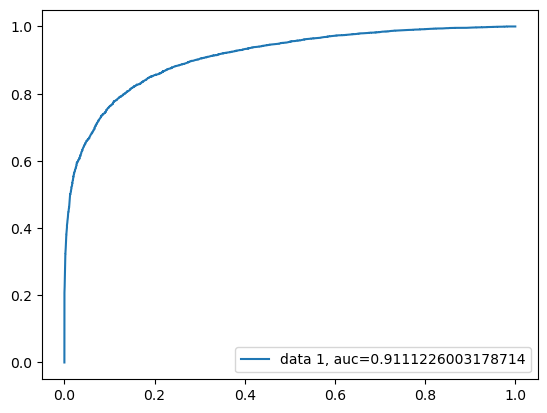

In [176]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [177]:
len(optimized_rf_clf.feature_importances_)

81

In [178]:
optimized_rf_clf.feature_importances_

array([4.93873824e-02, 5.09237659e-02, 3.15434961e-02, 4.25445850e-02,
       4.87033991e-02, 4.44564592e-02, 4.32776279e-02, 4.08568025e-02,
       3.96103928e-02, 3.91354926e-02, 4.95255021e-02, 4.83598682e-02,
       4.06300222e-02, 3.86962387e-02, 3.60436302e-02, 4.08907579e-02,
       9.71882422e-03, 1.01395647e-02, 7.11318833e-03, 2.01691371e-02,
       1.56136746e-02, 6.60762263e-03, 1.66267339e-02, 1.73531082e-02,
       2.98056678e-02, 1.13954048e-03, 2.34547193e-04, 4.42717420e-05,
       4.60362435e-05, 1.71411044e-05, 3.19754590e-05, 5.37550929e-03,
       8.09279132e-03, 2.50272817e-02, 1.90172045e-02, 8.93306494e-04,
       2.58983885e-04, 6.17495320e-05, 2.98874578e-05, 3.80918272e-05,
       0.00000000e+00, 4.81361888e-03, 6.36891922e-03, 2.36988084e-02,
       7.01555868e-03, 5.80994042e-04, 1.90371551e-04, 4.15114496e-05,
       5.76574000e-05, 2.48303991e-05, 6.27523703e-06, 3.84702092e-03,
       5.16594130e-03, 1.44946039e-02, 5.91846466e-03, 4.83898657e-04,
      

# Applying SVM

In [180]:
x=df_log.iloc[:,3:84]
y=df_log.iloc[:,0]

In [181]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [182]:
# defining parameter range 
#parameter_SVM = {'C': [0.1, 1, 10, 100],   
             # 'kernel': ['rbf']} 

In [183]:
x

array([[-1.76318118e+00, -1.06128182e+00, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.76306279e+00, -2.66057075e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.76294439e+00, -5.04624497e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       ...,
       [-2.16835571e-01, -5.84146971e-01,  1.00872666e+00, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-1.47666565e-03,  2.11077770e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03],
       [-6.06944199e-01, -1.07012126e-01, -9.91348839e-01, ...,
        -3.30547305e-02, -4.29398619e-02, -6.54237894e-03]])

In [185]:
clf = SVC(kernel="rbf",gamma=0.0001)# gamma is nothing but "a "

clf.fit(x_train , y_train)

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

print(classification_report(y_test, y_pred))

Accuracy = 72.87966331407377
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      7014
           1       0.81      0.60      0.69      7005

    accuracy                           0.73     14019
   macro avg       0.75      0.73      0.72     14019
weighted avg       0.75      0.73      0.72     14019



In [189]:
# Get the predicted classes
y_pred=clf.predict(x_test)

In [192]:
test_accuracy_SVM = accuracy_score(y_pred,y_test)
test_precision_score_SVM = precision_score(y_pred,y_test)
test_recall_score_SVM = recall_score(y_pred,y_test)
test_f1_score_SVM = f1_score(y_pred,y_test)
test_roc_score_SVM = roc_auc_score(y_pred,y_test)

print("The accuracy on test data is ", test_accuracy_SVM)
print("The precision on test data is ", test_precision_score_SVM)
print("The recall on test data is ", test_recall_score_SVM)
print("The f1 on test data is ", test_f1_score_SVM)
print("The roc_score on test data is ", test_roc_score_SVM)

The accuracy on test data is  0.7287966331407376
The precision on test data is  0.5971448965024982
The recall on test data is  0.8101878752663181
The f1 on test data is  0.6875410913872453
The roc_score on test data is  0.745766927696393


In [194]:
TrainAccuracy_SVM=ac(y_train,y_train_pred)
TrainAccuracy_SVM

1.0

In [193]:
TestAccuracy_SVM=ac(y_pred,y_test)
TestAccuracy_SVM

0.7287966331407376

# Apply Grid Search CV

In [111]:
# define the model
clf = SVC()

# Define the parameter distribution
param_dist = {'kernel':["rbf"],'gamma':scipy.stats.uniform(0.00001,50),'C':scipy.stats.uniform(0.1,14)}

# scoring metric
f1_scorer = make_scorer(f1_score)

# Randomized Search CV
rs = RandomizedSearchCV(clf, param_distributions = param_dist, 
                            n_iter = 50,
                            scoring=f1_scorer,
                            cv=10,
                            n_jobs=-1,
                            verbose=1)


In [ ]:
rs.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


# Evaluating Model

In [151]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [215]:
classifiers = ['Logistic Regression', 'Decision Tree','Random Forest ','SVM']
train_accuracy = [TrainAccuracy_log, TrainAccuracy_DT, TrainAccuracy_RF, TrainAccuracy_SVM]
test_accuracy = [TestAccuracy_log, TrainAccuracy_DT, test_accuracy_RF, test_accuracy_SVM]
precision_score = [test_precision_score_log,test_precision_score_DT ,test_precision_score_RF,test_precision_score_SVM]
recall_score = [test_recall_score_log,test_recall_score_DT,  test_recall_score_RF,test_recall_score_SVM]
f1_score = [test_f1_score_log, test_f1_score_DT,test_f1_score_RF,test_f1_score_SVM]

In [216]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.75386,0.749911,0.679943,0.789884,0.730802
1,Decision Tree,0.75386,0.753860,0.682655,0.792640,0.733548
2,Random Forest,1.00000,0.833512,0.797859,0.858921,0.827265
3,SVM,1.00000,0.728797,0.597145,0.810188,0.687541


# So our best model is Random Forest Model

In [288]:
print(classification_report(y_test,Random_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7014
           1       0.86      0.80      0.83      7005

    accuracy                           0.83     14019
   macro avg       0.84      0.83      0.83     14019
weighted avg       0.84      0.83      0.83     14019



# Model Deployment

In [289]:
from pickle import dump
from pickle import load

In [290]:
dump(Random_model, open('DefaulterPrediction.sav', 'wb'))

In [291]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
